# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  25
   25  25  25  25  25   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  35   4 126 253
  253 253 253 253 253 161   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

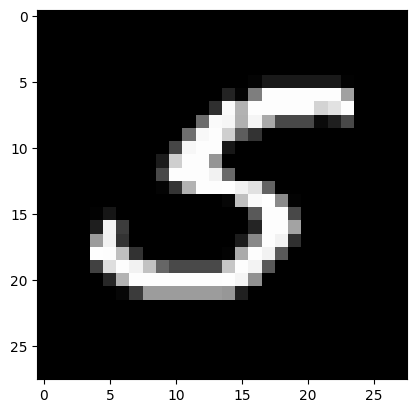

In [12]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


**Sanity check 1:** Find the shape of the train and test data and lebels



In [8]:
print("Train images shape:", train_images_orig.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images_orig.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


**Sanity Check 2:** Print the labels. How many unique label value do you see?

In [9]:
print("Train labels:", train_labels)
print("Unique labels:", np.unique(train_labels))
print("Number of unique labels:", len(np.unique(train_labels)))

Train labels: [5 0 4 ... 5 6 8]
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


### **Exercise 1:** Display the fourth image in the `test set` with its label.

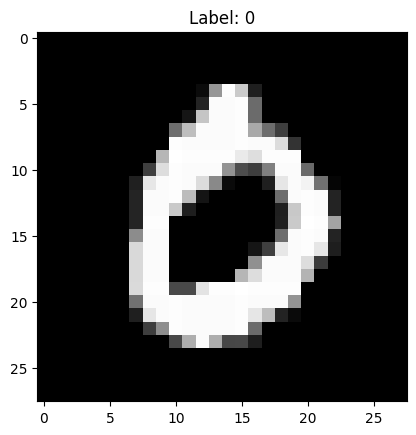

The label is: 0


In [10]:
index = 3  # Fourth image (0-indexed)
sample_image = test_images_orig[index]
sample_label = test_labels[index]

plt.imshow(sample_image, cmap="gray")
plt.title(f"Label: {sample_label}")
plt.show()
print(f"The label is: {sample_label}")

# A first look at a neural network

## **Step 1:** The network architecture

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

In [14]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [15]:
print("Train images shape after preprocessing:", train_images.shape)
print("Test images shape after preprocessing:", test_images.shape)

Train images shape after preprocessing: (60000, 784)
Test images shape after preprocessing: (10000, 784)


### Tensor reshaping

In [16]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [17]:
a_reshaped = a.reshape((6, 1))
print(a_reshaped)
print("Shape:", a_reshaped.shape)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Shape: (6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

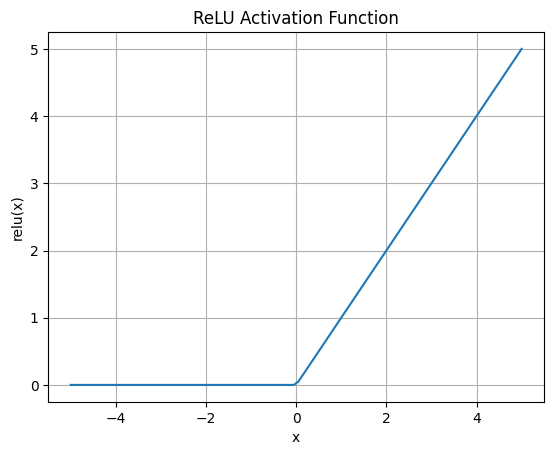

In [18]:
def relu(x):
    return np.maximum(0, x)

# Plotting
x = np.linspace(-5, 5, 100)
y = relu(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.show()

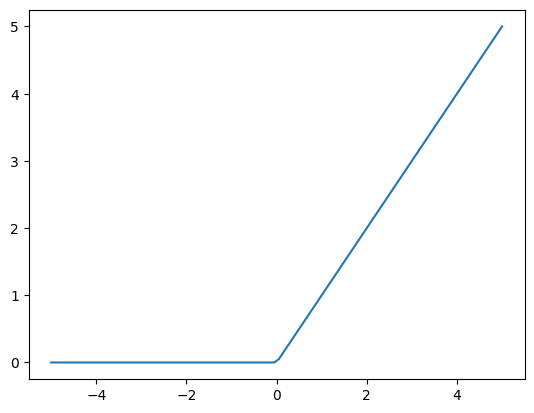

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here: From the image, the neuron summations are: [-10, 5, 0, -2, 6]
After ReLU (max(0, x)) the output is:

[0, 5, 0, 0, 6]

### **Output layer** - `Sigmoid` and `Softmax` activation function

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

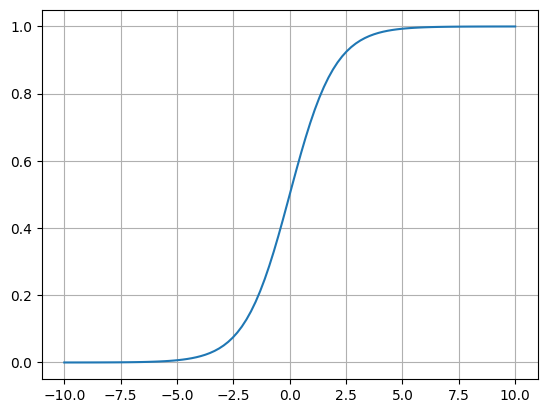

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Show bar plot of last layer values before applying any activation function (logits)
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

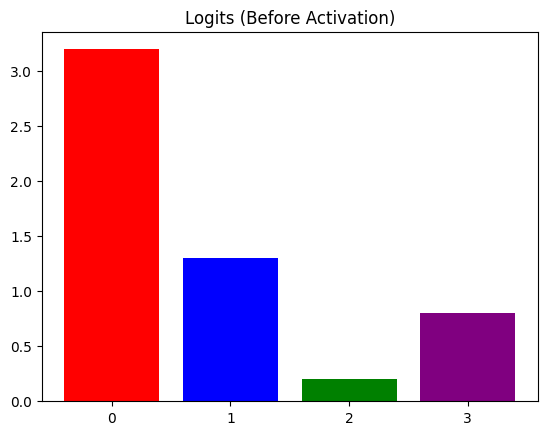

[0.96083428 0.78583498 0.549834   0.68997448]


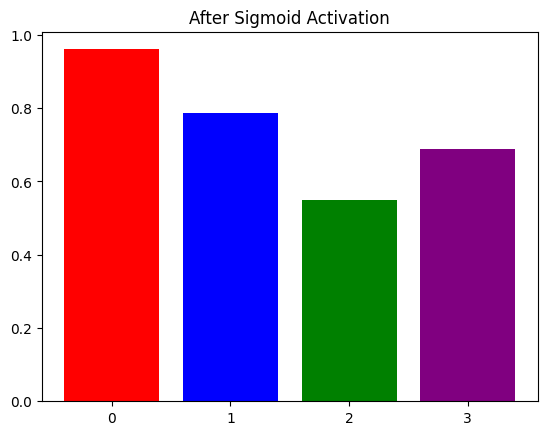

In [26]:
logits = np.array([3.2, 1.3, 0.2, 0.8])

# Plot logits before sigmoid
plt.bar(np.arange(4), logits, color=['red', 'blue', 'green', 'purple'])
plt.xticks(np.arange(4))
plt.title('Logits (Before Activation)')
plt.show()

# Apply sigmoid
logits_scaled = sigmoid(logits)
print(logits_scaled)

# Plot after sigmoid
plt.bar(np.arange(4), logits_scaled, color=['red', 'blue', 'green', 'purple'])
plt.xticks(np.arange(4))
plt.title('After Sigmoid Activation')
plt.show()

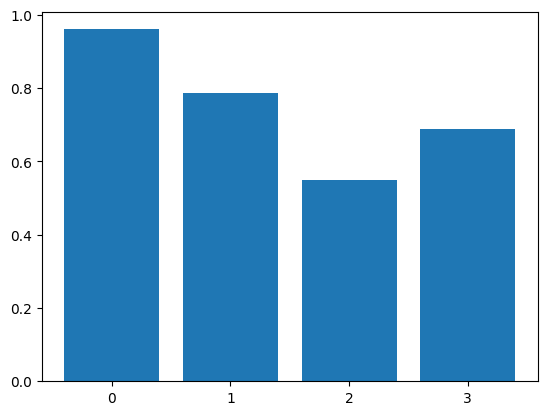

In [25]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])

logits_scaled = sigmoid(logits)

plt.bar(np.arange(4), logits_scaled)
plt.xticks(np.arange(4))
plt.show()


[0.96083428 0.78583498 0.549834   0.68997448]


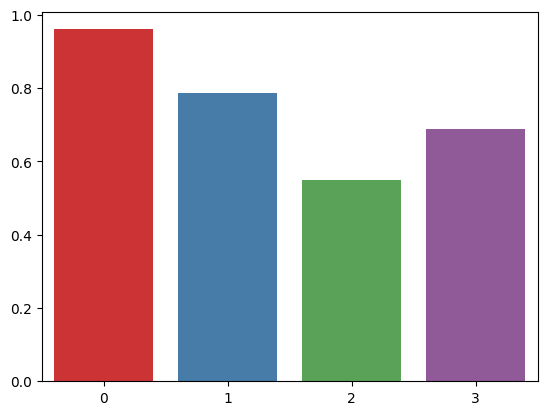

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [27]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


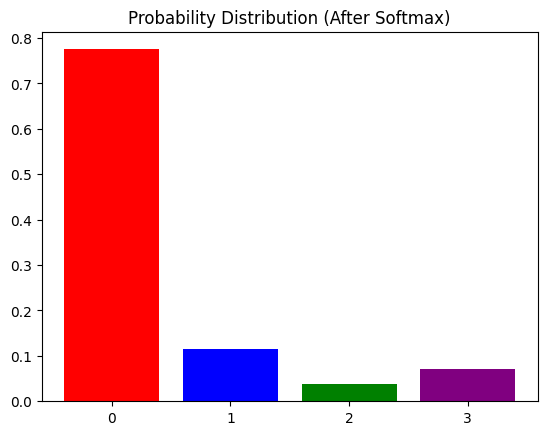

In [28]:
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits)

print(probs)
print("sum of all probs: ", sum(probs))

plt.bar(np.arange(4), probs, color=['red', 'blue', 'green', 'purple'])
plt.xticks(np.arange(4))
plt.title('Probability Distribution (After Softmax)')
plt.show()

[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


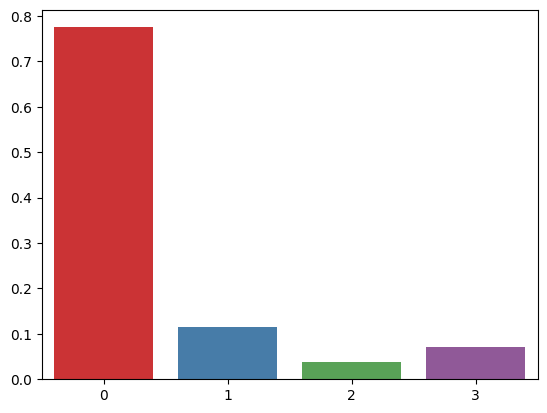

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [29]:
predicted_class = np.argmax(probs)
print("Predicted class:", predicted_class)

Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels. By taking argmax from the probabilty distribtion you can get the predicted label**







## **Step 2:** The compilation step

In [30]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

Revisit the model:

```python
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```




## **Step 3:** "Fitting" the model

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8771 - loss: 0.4316
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1167
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9839 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0358


## **Step 4:** Using the model to make predictions

In [32]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
print("input shape:", test_digits.shape)

predictions = model.predict(test_digits)
print("output shape: ", predictions.shape)
predictions


input shape: (3, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
output shape:  (3, 10)


array([[8.6989800e-08, 1.4257872e-09, 3.3474448e-06, 2.2972023e-05,
        3.6051431e-12, 8.4281723e-08, 2.1720470e-13, 9.9996936e-01,
        1.7423638e-07, 4.0546252e-06],
       [6.8885313e-08, 1.9266126e-06, 9.9981201e-01, 2.0071187e-05,
        1.8995641e-13, 8.0492271e-07, 2.0005295e-07, 1.5617507e-11,
        1.6489315e-04, 5.6946938e-12],
       [6.1562548e-07, 9.9786383e-01, 8.2412640e-05, 7.1163718e-06,
        9.4987634e-05, 8.8911047e-06, 6.1621344e-05, 7.3187175e-04,
        1.1437351e-03, 4.7560397e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here: The predictions array contains the probability distribution over the 10 digit classes (0-9) for each of the 3 test images. Each row sums to 1.0, representing the model's confidence that each image belongs to each of the 10 possible classes. The highest probability in each row indicates the predicted digit for that image.

### See the result for the prediction of the first image

In [33]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[8.6989800e-08 1.4257872e-09 3.3474448e-06 2.2972023e-05 3.6051431e-12
 8.4281723e-08 2.1720470e-13 9.9996936e-01 1.7423638e-07 4.0546252e-06]
Predicted label:  7


In [34]:
print("highest prob: ", predictions[0][7])

highest prob:  0.99996936


In [35]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


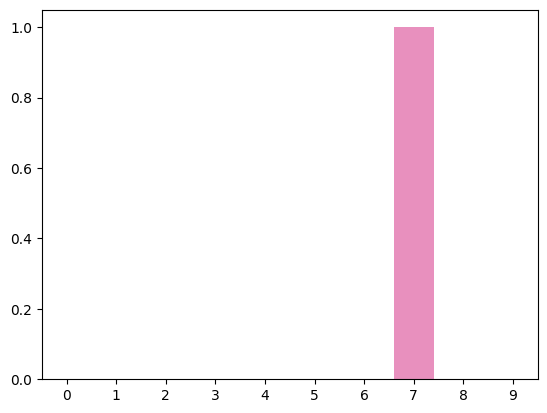

In [36]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predicted label: 0
True label: 0


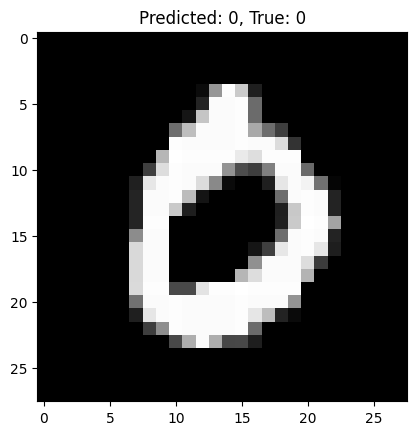

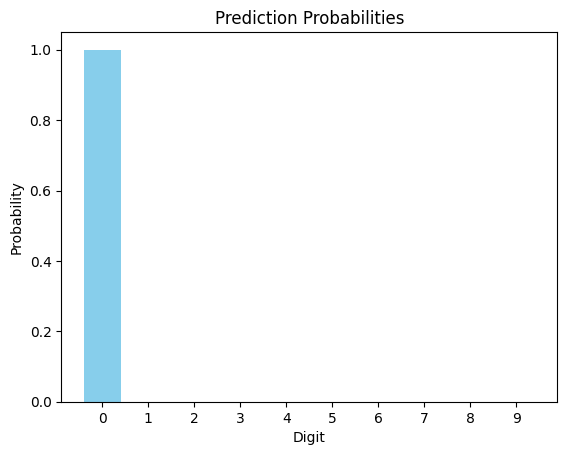

In [37]:
# Get the fourth test image
fourth_image = test_images[3]

# Reshape to batch format (1, 784)
fourth_image_batch = fourth_image.reshape(1, 784)

# Make prediction
prediction = model.predict(fourth_image_batch)

# Get predicted label
predicted_label = np.argmax(prediction[0])
true_label = test_labels[3]

print("Predicted label:", predicted_label)
print("True label:", true_label)

# Show the image
plt.imshow(test_images_orig[3], cmap="gray")
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()

# Plot probability distribution
plt.bar(np.arange(10), prediction[0], color='skyblue')
plt.xticks(np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()

## **Step 5:** Evaluating the model on new data

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0737
test_acc: 0.9793999791145325


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.